In [25]:
import geopandas as gpd
shapefile = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'

In [26]:
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,United Republic of Tanzania,TZA,POLYGON ((33.90371119710453 -0.950000000000000...
2,Western Sahara,SAH,POLYGON ((-8.665589565454809 27.65642588959236...
3,Canada,CAN,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,United States of America,USA,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [27]:
print(gdf[gdf['country'] == 'Antarctica'])


        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  (POLYGON ((-48.66061601418252 -78.047018731598...  


In [28]:
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

In [29]:
import pandas as pd
datafile = 'cross-country-literacy-rates.csv'
#Read csv file using pandas
df = pd.read_csv(datafile, names = ['entity', 'code', 'year', 'literacy_rates'], skiprows = 1)
df.head()

,entity,code,year,literacy_rates
0,Afghanistan,AFG,1979,18.157681
1,Afghanistan,AFG,2011,31.741119
2,Afghanistan,AFG,2015,38.168041
3,Albania,ALB,2001,98.712982
4,Albania,ALB,2008,95.938637


In [42]:
#Filter data for year 2015.
df_2015 = df[df['year'] == 2015]

#Merge dataframes gdf and df_2015.
merged = gdf.merge(df_2015, left_on = 'country_code', right_on = 'code', how ='left')
#Replace NaN values to string 'No data'.
merged.fillna('No data', inplace = True)

In [43]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)


In [44]:
from bokeh.palettes import mpl
from bokeh.io import export_png
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.models import HoverTool

In [45]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential viridis palette.
palette = mpl['Viridis'][10]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 100, nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '10': '10%', '20':'20%', '30':'30%', '40':'40%', '50':'50%', '60':'60%', '70':'70%', '80':'80%','90':'90%','100':'100%'}#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

hover = HoverTool(tooltips = [('Country','@country'),('% literacy rates', '@literacy_rates')])
#Create figure object.
p = figure(title = 'Literacy rates, 2015', plot_height = 600 , plot_width = 950, toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'literacy_rates', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

Loading BokehJS ...

In [14]:
! pip install selenium
! conda install phantomjs --yes

Solving environment: done

# All requested packages already installed.



In [53]:
export_png(p, filename="Literacy rates.png")

'/Users/yangfanzhang/Desktop/Literacy rates.png'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from colorspacious import cspace_convert

image_sRGB = plt.imread("Literacy rates.png")



image_sRGB = image_sRGB[:,:,0:3]
image_sRGB.shape

(600, 950, 3)

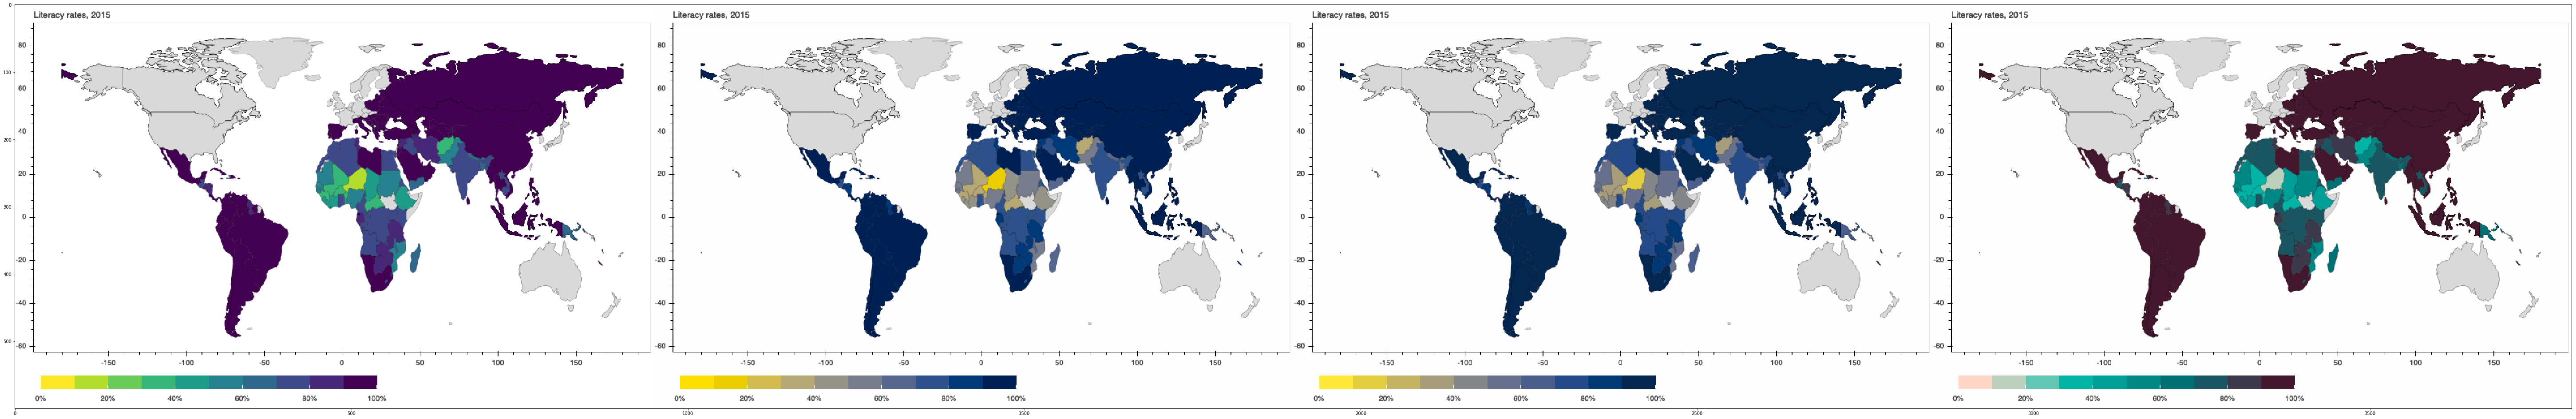

In [21]:
# Function from online source for comparing two images side by side:
def compare_images(*new):
    image_width = 20# inches
    total_width = (1 + len(new)) * image_width
    height = image_width / image_sRGB.shape[1] * image_sRGB.shape[0]
    fig = plt.figure(figsize=(total_width, height))
    ax = fig.add_axes((0, 0, 1, 1))
    ax.imshow(np.column_stack((image_sRGB,) + new))
# Setup for colorspacious module:
cvd_space = {"name": "sRGB1+CVD",
             "cvd_type": "protanomaly",
             "severity": 100}

cvd_space2 = {"name": "sRGB1+CVD",
             "cvd_type": "deuteranomaly",
             "severity": 100}

cvd_space3 = {"name": "sRGB1+CVD",
             "cvd_type": "tritanomaly",
             "severity": 100}
# Compare our original plot with chosen colormap to the altered one:
image_protanomaly_sRGB = cspace_convert(image_sRGB, cvd_space, "sRGB1")
image_deuteranomaly_sRGB = cspace_convert(image_sRGB, cvd_space2, "sRGB1")
image_dtritanomaly_sRGB = cspace_convert(image_sRGB, cvd_space3, "sRGB1")
compare_images(np.clip(image_protanomaly_sRGB, 0, 1),
              np.clip(image_deuteranomaly_sRGB, 0, 1),
              np.clip(image_dtritanomaly_sRGB,0,1))